In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt 

In [3]:
data=pd.read_csv('estrescape.csv',sep=';') # Base de datos para Cape con estres percibido

In [4]:
X=data.iloc[:,range(1,7)] #Se toman las variables independientes que serían las CAPE

In [5]:
y=data.iloc[:,0]#Se toman los valores de la variable a predecir (Estres percibido)

In [6]:
X=data[['CAPEPOSITFREC', 'CAPEPOSMALESTAR', 'CAPENEGFREC',
        'CAPENEGMALESTAR', 'CAPEDEPREFREC', 'CAPEDEPREMALESTAR']] #Otra forma de tomar las variables independientes

In [7]:
data.axes[1] #Permite ver los nombres de las columnas

Index(['ESTRESPERCIB', 'CAPEPOSITFREC', 'CAPEPOSMALESTAR', 'CAPENEGFREC',
       'CAPENEGMALESTAR', 'CAPEDEPREFREC', 'CAPEDEPREMALESTAR'],
      dtype='object')

In [8]:
y=data['ESTRESPERCIB'] ##Otra forma de tomar la variable a predecir

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5) #Se crean los valores 
                                                                                #para las variables de entrenamiento y testeo
                                                                                #Para el ejercicio 80% de entrenamiento 20% de testing

In [10]:
modelo1=KNeighborsClassifier(n_neighbors=5) #Kneiggbors con 5 vecinos

In [11]:
modelo1.fit(X_train,y_train) #Se entrena el modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_predict_modelo1=modelo1.predict(X_test) #Se crean las variables a predecir

In [13]:
accuracy_score(y_test,y_predict_modelo1) #Se mide la precisión del modelo 

0.7241379310344828

In [14]:
modelo2=GaussianNB() #Naive Bayes

In [15]:
modelo2.fit(X_train,y_train)

GaussianNB(priors=None)

In [16]:
y_predict_modelo2=modelo2.predict(X_test)

In [17]:
accuracy_score(y_test,y_predict_modelo2)

0.5862068965517241

In [18]:
modelo3=KMeans(n_clusters=2) #Kmeans Cluster

In [19]:
modelo3.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
modelo3.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [21]:
y_predict_modelo3=modelo3.predict(X_test)

In [22]:
accuracy_score(y_test,y_predict_modelo3)

0.46551724137931033

In [23]:
modelo4=DecisionTreeClassifier(criterion='gini',random_state=7,max_depth=3, min_samples_leaf=5)

In [24]:
modelo4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [25]:
y_predict_modelo4=modelo4.predict(X_test)

In [26]:
accuracy_score(y_test,y_predict_modelo4)

0.7068965517241379

In [27]:
modelo5=SVC() #Support Vector Machine

In [28]:
modelo5.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_predict_modelo5=modelo5.predict(X_test)

In [30]:
accuracy_score(y_test,y_predict_modelo5)

0.7068965517241379

In [31]:
modelo6=RandomForestClassifier(n_estimators=2000)

In [32]:
modelo6.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_predict_modelo6=modelo6.predict(X_test)

In [34]:
accuracy_score(y_test,y_predict_modelo6)

0.7413793103448276

In [35]:
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_predict_modelo6))

[[ 1  6  0]
 [ 0 39  2]
 [ 0  7  3]]


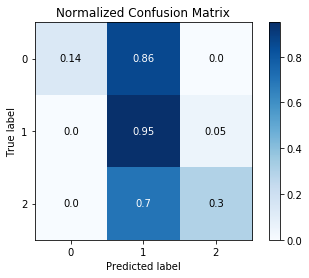

In [39]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict_modelo6, normalize=True)
plt.show()

In [56]:
modelo7=MLPClassifier(activation='relu',hidden_layer_sizes=(12,12,12),
                      max_iter=20000)

In [57]:
modelo7.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 12, 12), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
y_predict_modelo7=modelo7.predict(X_test)

In [59]:
accuracy_score(y_test,y_predict_modelo7)

0.6896551724137931

In [60]:
x=list(X.axes[1]) #Se ubican los nombres de las variables dependientes

In [61]:
caract=len(X.axes[1]) #Se determina el número de columnas

([<matplotlib.axis.YTick at 0x15cb6f0>,
 <a list of 6 Text yticklabel objects>)

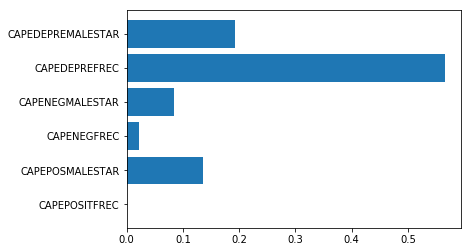

In [62]:
plt.barh(range(caract),modelo4.feature_importances_)#Presenta la variable que más aporta al modelo
plt.yticks(np.arange(caract),x)